In [80]:
%matplotlib inline

import scipy.stats as st
import numpy as np
import pandas as pd
from matplotlib import pyplot

## Container startup time distribution
The output of this section is an animation of the startup time of Eliot containers over a time series extracted from Prometheus. The dashboard panel "Container startup time" has been used, where the prometheus query is 
```
- sort(kube_pod_created{namespace="eliot"}) + kube_pod_start_time{namespace="eliot"}
```

To export the data you need to go the panel in Grafana, go for the query inspector and export the CSV with the "Join by time" option in the Transformer; be sure to choose the correct time frame.

In [82]:
np.random.seed(45873)
df = pd.read_csv("data/startup_time.csv")

Here we just show the final distribution

In [83]:
timestamp = df.tail(1)['Time']
containers_activation_time = df.tail(1).drop('Time', axis=1)
bins = np.arange(x_min,x_max, 0.5)

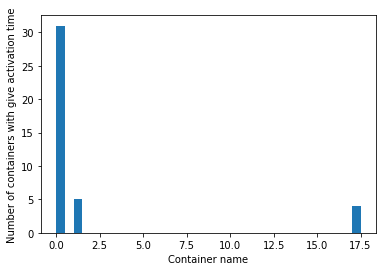

In [84]:
pyplot.hist(containers_activation_time, bins=bins)
pyplot.xlabel('Container name')
pyplot.ylabel('Number of containers with give activation time')
pyplot.show()

Here we generate the animation

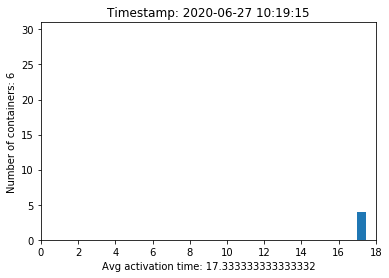

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

# Get correct limits from last time series
containers_activation_time = df.iloc[-1][1:].dropna()
number_of_frames = len(df.index)
x_min, x_max = int(min(containers_activation_time)), int(max(containers_activation_time))
y_min, y_max = 0, containers_activation_time.value_counts().max()
bins = np.arange(x_min,x_max, 0.5)

def update_hist(i):
    pyplot.cla()
    timestamp = df.iloc[i][0]
    containers_activation_time = df.iloc[i][1:].dropna()

    pyplot.hist(containers_activation_time, bins)
    pyplot.xlabel('Avg activation time: ' + str(np.mean(containers_activation_time)))
    pyplot.ylabel('Number of containers: ' + str(len(containers_activation_time)))
    pyplot.title('Timestamp: ' + timestamp)
    pyplot.xlim(x_min,x_max)
    pyplot.ylim(y_min,y_max)
    
animation = animation.FuncAnimation(fig, update_hist, number_of_frames, repeat=False)
animation.save('containers_startup_time.mp4')
plt.show()

